In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Lessons learned
* Make notes on classic EDA stuff
 * grouping and aggregating
 * summary statistics
 * basic plots
 * correlations

How to improve the data
* good column names from the start
* no unnecessary whitespace
* sensible group names

# Diagnostic plots

In [21]:
log = pd.read_csv('log_4_6_20180828_14_05_29.csv', sep=',')

### Accept + move type statistics

In [22]:
log['accept'].value_counts()

0.0    3442236
1.0     396151
Name: accept, dtype: int64

In [23]:
log['type'].value_counts()

D    1335261
M    1333552
B    1331187
Name: type, dtype: int64

In [24]:
log.groupby('accept')['type'].value_counts()

accept  type
0.0     M       1213739
        D       1184878
        B       1043619
1.0     B        150551
        D        150383
        M         95217
Name: type, dtype: int64

### Convergence

In [25]:
log['time'] = log['time'].replace(math.nan,'',regex=True)
log['time'] = pd.to_numeric(log['time'])

In [30]:
block_length = 40000
groupby_blocks = np.repeat(range(int(len(log)/block_length)),block_length)
groupby_blocks = np.array([0] + list(groupby_blocks+1))[0:-1]

In [31]:
groupedlog = log.groupby([groupby_blocks, 'type'])['accept'].sum().reset_index()

In [32]:
groupedmeanlog = log.groupby([groupby_blocks])['energy','no_act_vrt','time'].mean().reset_index()

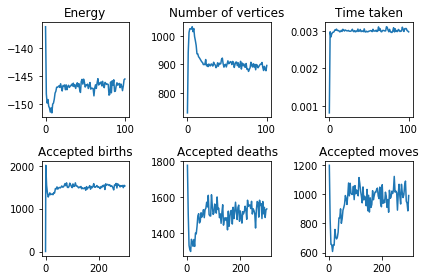

In [33]:

plt.subplot(2,3,1)
plt.title('Energy')
groupedmeanlog['energy'].plot()

plt.subplot(2,3,2)
plt.title('Number of vertices')
groupedmeanlog['no_act_vrt'].plot()

plt.subplot(2,3,3)
plt.title('Time taken')
groupedmeanlog['time'].plot()

plt.subplot(2,3,4)
plt.title('Accepted births')
groupedlog[groupedlog['type'] == 'B']['accept'].plot()

plt.subplot(2,3,5)
plt.title('Accepted deaths')
groupedlog[groupedlog['type'] == 'D']['accept'].plot()

plt.subplot(2,3,6)
plt.title('Accepted moves')
groupedlog[groupedlog['type'] == 'M']['accept'].plot()


plt.tight_layout()
# plt.show()

plt.savefig('foo.pdf')

In [34]:
log['energy'] - log['energy_after']

0            0.089
1         -135.178
2         -135.178
3         -135.178
4         -135.178
5            0.130
6         -135.308
7         -135.308
8            0.065
9         -135.373
10        -135.373
11        -135.373
12           0.088
13        -135.461
14          -0.035
15        -135.426
16           0.076
17        -135.426
18           0.080
19        -135.506
20           0.081
21        -135.506
22           0.072
23           0.080
24        -135.658
25        -135.658
26        -135.658
27        -135.658
28        -135.658
29           0.084
            ...   
3999970        NaN
3999971   -145.097
3999972   -145.097
3999973   -145.097
3999974   -145.097
3999975   -145.097
3999976   -145.097
3999977   -145.097
3999978   -145.097
3999979   -145.097
3999980   -145.097
3999981   -145.097
3999982   -145.097
3999983   -145.097
3999984   -145.097
3999985   -145.097
3999986   -145.097
3999987   -145.097
3999988   -145.097
3999989   -145.097
3999990   -145.097
3999991   -1

### Checking if the energy does not move by itself

In [89]:
lognona = log[~log.isnull().any(axis=1)]
logshift = lognona.assign(shiftenergy = lognona['energy'].shift(-1))

In [90]:
logshift[(logshift['shiftenergy'] - logshift['energy'] != 0) & (logshift['accept'] != 1)]

,step_no,type,pt,pt_mv,energy,energy_after,b,ratio,accept,no_vrt,no_act_vrt,time,shiftenergy
1999999,2000000,B,0.260079 0.576914 0.170576 0.0041291,,145.211,-1.0,0.762074,0.511364,0.0,6142.0,871.0,0.002197,NaN


# Cell data distributions

In [268]:
cell_data = pd.read_csv('cell_data_3_6_20180831_07_42_15.txt', sep=';')

In [269]:
cell_data

,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,edge_length,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.001,0.5,-3,500,0.01,-403.573,"[0.00051801, 0.000442111, 0.000937155, 0.00114...","[0.144801, 0.127062, 0.135698, 0.145412, 0.136...","[0.00490049, 0.00365733, 0.00436645, 0.0087297...","[0.0897577, 0.157135, 0.135015, 0.156581, 0.11...",...,"[15, 17, 23, 23, 10, 10, 9, 20, 18, 16, 12, 11...",3449,527,513,0.019736,0.001004,0.467679,-1.16816,480.295,-1.05554


In [270]:
cell_data.tetra_volume[0]

'[0.00051801, 0.000442111, 0.000937155, 0.00114379, 0.000473616, 0.000118915, 0.000305407, 0.00115488, 0.000249102, 0.000871939, 0.000338048, 0.000546455, 0.000361456, 0.000237543, 0.000319262, 0.000285396, 9.87259e-05, 0.00039815, 5.44123e-05, 6.10967e-05, 0.000553542, 0.000140159, 0.000224952, 0.000599338, 0.000165747, 0.000449243, 0.000199763, 0.000300265, 0.000720441, 0.000287502, 0.000369046, 0.000744479, 0.00154471, 8.44969e-05, 0.000595851, 0.000137221, 0.000256781, 0.000607682, 0.000998888, 0.000152131, 0.000971902, 0.000334322, 0.000387109, 0.00018598, 7.5969e-05, 0.000243209, 3.9927e-05, 4.18099e-05, 0.000273232, 0.000434019, 7.59753e-05, 0.000262637, 0.000255916, 0.000695981, 0.00024579, 0.000169875, 0.000162706, 0.000179003, 0.000121481, 0.000277794, 0.000298719, 0.000885952, 0.000378353, 0.000159399, 0.000313562, 2.90337e-05, 0.00012634, 0.00033991, 0.000319553, 0.000344943, 0.000918036, 9.17877e-05, 0.00069617, 0.000277213, 0.000667393, 0.000707629, 0.0011377, 0.000338815

In [271]:
def listify(string):
        strlist = string[1:-2].replace(' ','').split(',')[:-1]
        result = [float(num) for num in strlist]
        return(result)

In [272]:
volumes = listify(cell_data.tetra_volume[0])

In [273]:
print(np.mean(volumes), np.std(volumes))

0.00030380549917657294 0.0002816449132519906


In [274]:
bins = np.linspace(0,0.002,30)

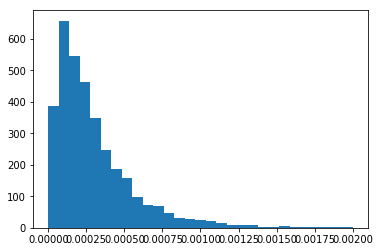

In [275]:
plt.hist(volumes,bins)
plt.show()

---

In [276]:
cell_data_neg = pd.read_csv('cell_data_3_6_20180831_07_42_37.txt', sep=';')

In [277]:
cell_data_neg

,epsilon,alpha,theta,z,max_weight,energy,tetra_volume,tetra_circum,face_surf,edge_length,...,point_degree,cells,vertices,removable,epsilon_est,face_est,alpha_est,theta_est,z_est,theta_known_z_est
0,0.001,0.5,2,500,0.01,205.277,"[0.00091977, 0.00038755, 6.60417e-05, 0.004409...","[0.200171, 0.101447, 0.131165, 0.242588, 0.098...","[0.00464888, 0.00596603, 0.00442227, 0.0034970...","[0.168677, 0.146787, 0.14863, 0.111111, 0.0976...",...,"[16, 17, 8, 8, 16, 27, 9, 16, 16, 10, 15, 13, ...",1917,308,302,0.028399,0.001013,0.494416,2.37337,409.166,2.48103


In [278]:
len(listify(cell_data_neg.tetra_circum[0]))

1917

In [279]:
len(listify(cell_data_neg.point_degree[0]))

308

### Volumes

In [280]:
volumes_neg = listify(cell_data_neg.tetra_volume[0])

In [281]:
len(volumes)

3449

In [282]:
print(np.mean(volumes_neg), np.std(volumes_neg))

0.0005364414973343766 0.0007689994048222379


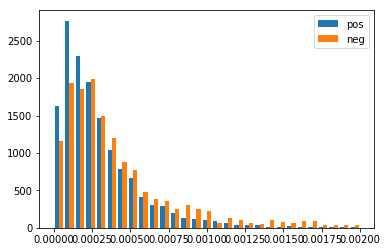

In [283]:
plt.hist([volumes,volumes_neg],bins, density = True,  label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Circumradius

In [284]:
circum = listify(cell_data.tetra_circum[0])
circum_neg = listify(cell_data_neg.tetra_circum[0])

In [285]:
bins_circum = np.linspace(0.03,0.5,50)

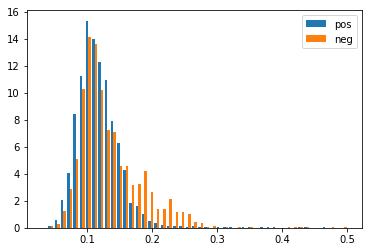

In [286]:
plt.hist([circum,circum_neg],bins_circum, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Face surface

In [287]:
surf = listify(cell_data.face_surf[0])
surf_neg = listify(cell_data_neg.face_surf[0])

In [288]:
bins_surf = np.linspace(0.0004,0.05,30)

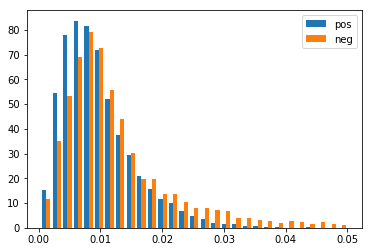

In [289]:
plt.hist([surf,surf_neg],bins_surf, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Edge length

In [290]:
length = listify(cell_data.edge_length[0])
length_neg = listify(cell_data_neg.edge_length[0])

In [293]:
bins_length = np.linspace(0.01,0.5,30)

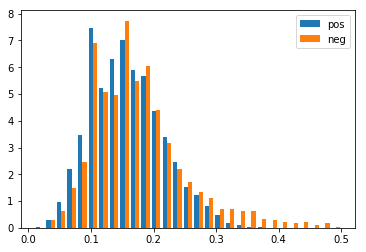

In [307]:
plt.hist([length,length_neg],bins_length, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()

### Point degree

In [295]:
deg = listify(cell_data.point_degree[0])
deg_neg =  listify(cell_data_neg.point_degree[0])

In [304]:
bins_deg = np.linspace(0,40,30)

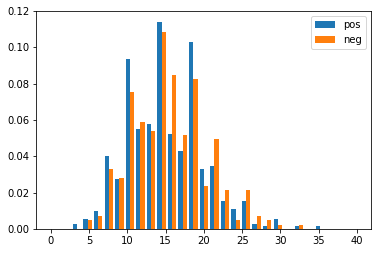

In [306]:
plt.hist([deg,deg_neg],bins_deg, density = True, label=['pos','neg'])
plt.legend(loc='upper right')
plt.show()